In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [190]:
df = pd.read_json('./Data_FixedENG.json')
df.sort_index(inplace=True)
df.shape

(3526, 22)

# GRE

** GRE Quant Alt Verbal **

In [191]:
# Renaming columns to make it more clear
df.rename(columns={"engExamQuan": 'greQuan', 'engExamAnlt': 'greAnlt',"engExamVrbl":"greVrbl"}, inplace=True)

In [192]:
df.greQuan=df.greQuan.apply(pd.to_numeric, errors='coerce')
df.greAnlt=df.greAnlt.apply(pd.to_numeric, errors='coerce')
df.greVrbl=df.greVrbl.apply(pd.to_numeric, errors='coerce')

In [193]:
df[df['greQuan'].notnull()][["greQuan","greAnlt","greVrbl"]].head()

,greQuan,greAnlt,greVrbl
3,760.0,3.0,330.0
5,800.0,3.5,320.0
6,800.0,3.0,310.0
10,760.0,4.5,320.0
12,700.0,3.5,380.0


In [194]:
df[df['greQuan'].notnull()].count()[1]

1560

## So 1560 students have GRE

### For students who want to study at US universities ,it is mandatory to pass GRE exam. Now lets see how many have and have not GRE 

In [195]:
do=df[(df.country==u'آمریکا')&(df['greQuan'].notnull())][["greQuan","greAnlt","greVrbl"]]
print(do.count()[0],df[df['country']==u'آمریکا'].count()[0])

(956, 1137)


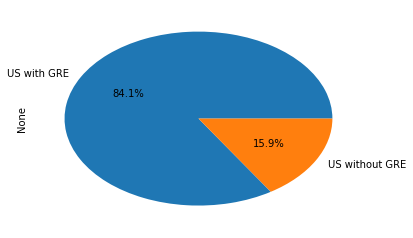

In [196]:
dont=df[(df.country==u'آمریکا')].count()[0]-do.count()[0]
s=pd.Series((do.count()[0],dont),index=['US with GRE','US without GRE'])
s.plot(autopct='%1.1f%%',kind='pie')
plt.show()

About 16% (181/1137) of students who admitted from US universities have no GRE record  

### Lets see others GRE result (exclude missing countries) 

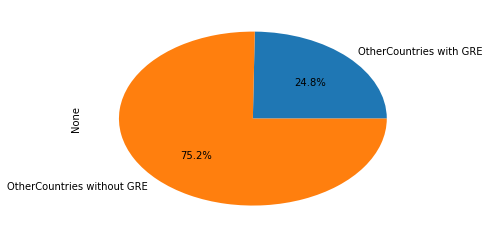

In [197]:
do=df[(df.country!=u'آمریکا')&(df.country!='n/a')&(df.greQuan.notnull())][["greQuan","greAnlt","greVrbl"]].count()[0]
dont=df[(df.country!=u'آمریکا')&(df.country!='n/a')].count()[0]-do
s=pd.Series((do,dont),index=['OtherCountries with GRE','OtherCountries without GRE'])
s.plot(autopct='%1.1f%%',kind='pie')
plt.show()

In [198]:
print(dont,df[(df['country']!=u'آمریکا')&(df['country']!='n/a')].count()[0])

(1394, 1853)


About 75% (1394/1853) of students who admitted from Non-US universities have no GRE record  

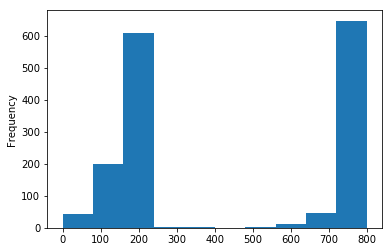

In [199]:
df.greQuan.sort_index().plot(kind='hist')
plt.show()

In [200]:
df.greQuan.value_counts().sort_index().head(7)

0.0      13
2.0       7
3.0      19
4.0       2
7.0       1
137.0     1
140.0     1
Name: greQuan, dtype: int64

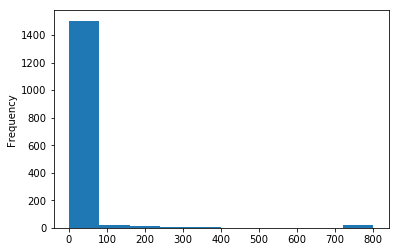

In [201]:
df.greAnlt.sort_index().plot(kind='hist')
plt.show()

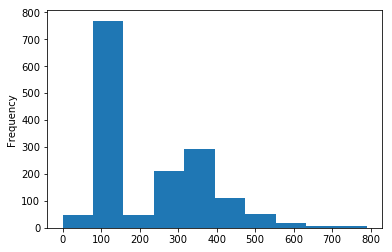

In [202]:
df.greVrbl.sort_index().plot(kind='hist')
plt.show()

In [203]:
df.greVrbl.value_counts().sort_index().head(7)

0.0      30
2.0       2
3.0      12
4.0       2
6.0       1
130.0     1
131.0     2
Name: greVrbl, dtype: int64

GRE scores are in different format

In [204]:
df['gre']=df.greQuan.notnull()

In [205]:
df.head(10)[["greQuan","greAnlt","greVrbl",'gre']]

,greQuan,greAnlt,greVrbl,gre
2,NaN,NaN,NaN,False
3,760.0,3.0,330.0,True
5,800.0,3.5,320.0,True
6,800.0,3.0,310.0,True
7,NaN,NaN,NaN,False
8,NaN,NaN,NaN,False
9,NaN,NaN,NaN,False
10,760.0,4.5,320.0,True
12,700.0,3.5,380.0,True
13,800.0,3.5,370.0,True


In [206]:
df.greVrbl.replace(df[df.greVrbl<10].greVrbl.values,0,inplace=True)

In [207]:
df.greQuan.replace(df[df.greQuan<10].greQuan.values,0,inplace=True)

# Convert OldGre and NewGre Scale to Ranks

## Based on : http://www.qsleap.com/articles/old-gre-to-new-gre-score-conversion/

In [208]:
verbal = pd.read_json('verbal.json')
verbal.head()

,% Rank,Current Scale,Prior Scale
0,99,170,800
1,99,170,790
10,96,166,700
11,95,165,690
12,95,165,680


In [209]:
quant = pd.read_json('quant.json')
quant.tail()

,% Rank,Current Scale,Prior Scale
6,71,158,740
60,0,131,200
7,68,157,730
8,64,156,720
9,60,155,710


In [210]:
counter=0;counter2=0
for inx in df.index:
    temp=df.ix[inx]['greVrbl']
    isin=verbal['Prior Scale'].isin([temp])
    isin=isin[isin==True]
    if len(isin)!=0:
        res=verbal.ix[isin.index[0]]['Current Scale']
        df.set_value(inx, 'greVrbl',float(res))
        counter+=1
    temp=df.ix[inx]['greQuan']
    isin=verbal['Prior Scale'].isin([temp])
    isin=isin[isin==True]
    if len(isin)!=0:
        res=verbal.ix[isin.index[0]]['Current Scale']
        df.set_value(inx, 'greQuan',float(res))
        counter2+=1

In [211]:
df.greQuan.replace(df[df.greQuan>171].greQuan.values,0,inplace=True)

In [212]:
zeros=df[df.greVrbl==0].index
df.greVrbl.replace(0,np.nan,inplace=True)
for z in zeros:
    df.set_value(z, 'greVrbl',df.greVrbl.mean())

In [213]:
zeros=df[(df.greQuan==0)].index
df.greQuan.replace(0,np.nan,inplace=True)
for z in zeros:
    df.set_value(z, 'greQuan',df.greQuan.mean())

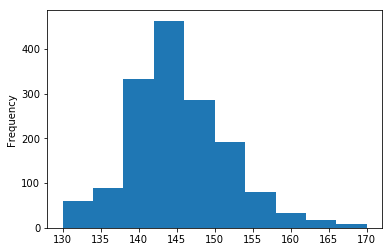

In [214]:
df.greVrbl.plot(kind='hist')
plt.show()

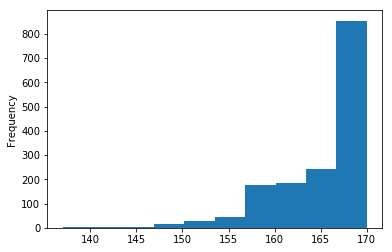

In [219]:
df.greQuan.plot(kind='hist')
plt.show()

# GMAT Score = -2080.75 + 6.38*GRE Verbal Score + 10.62*GRE Quant Score
### Based on: http://www.qsleap.com/articles/gre-to-gmat-score-conversion/

In [216]:
df['gmat']=(df.greQuan*10.62)+(df.greVrbl*6.38)-2080.75

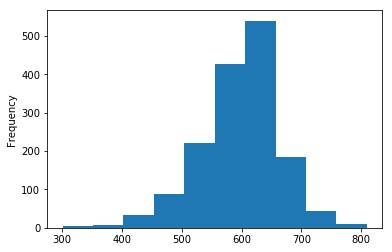

In [220]:
df.gmat.plot(kind='hist')
plt.show()

# Saving

In [218]:
df.to_json('Data_FixedENG.json',date_format='utf8')